In [23]:
from pprint import pprint
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from shapely.geometry import Point, Polygon

In [24]:
neighbourhoods = gpd.read_file('neighbourhoods.geojson')
print(neighbourhoods.head())

    neighbourhood neighbourhood_group  \
0  Lincoln Square                None   
1       Hyde Park                None   
2        Woodlawn                None   
3     Rogers Park                None   
4  Jefferson Park                None   

                                            geometry  
0  (POLYGON ((-87.674408 41.976103, -87.674404 41...  
1  (POLYGON ((-87.580377 41.802525, -87.580395999...  
2  (POLYGON ((-87.577145 41.786146, -87.577145 41...  
3  (POLYGON ((-87.654556 41.998166, -87.655737 41...  
4  (POLYGON ((-87.752635 41.967967, -87.752789000...  


In [25]:
neighbourhoods.neighbourhood_group.notna().sum()

neighbourhoods.drop('neighbourhood_group', axis=1, inplace =True)

neighbourhoods.head()

,neighbourhood,geometry
0,Lincoln Square,"(POLYGON ((-87.674408 41.976103, -87.674404 41..."
1,Hyde Park,"(POLYGON ((-87.580377 41.802525, -87.580395999..."
2,Woodlawn,"(POLYGON ((-87.577145 41.786146, -87.577145 41..."
3,Rogers Park,"(POLYGON ((-87.654556 41.998166, -87.655737 41..."
4,Jefferson Park,"(POLYGON ((-87.752635 41.967967, -87.752789000..."


In [26]:
print(neighbourhoods.crs)

{'init': 'epsg:4326'}


In [27]:
neighbourhoods_3857 = neighbourhoods.to_crs(epsg=3857)

In [28]:
neighbourhoods_3857.head()

,neighbourhood,geometry
0,Lincoln Square,(POLYGON ((-9759870.454161711 5157400.46122701...
1,Hyde Park,(POLYGON ((-9749402.971122928 5131444.39305334...
2,Woodlawn,(POLYGON ((-9749043.186528685 5128998.78674355...
3,Rogers Park,(POLYGON ((-9757660.539630484 5160704.72370305...
4,Jefferson Park,(POLYGON ((-9768578.643967995 5156182.26309876...


In [29]:
neighbourhoods['area_kms'] = neighbourhoods_3857.geometry.area / 10**6

In [30]:
neighbourhoods.head()

,neighbourhood,geometry,area_kms
0,Lincoln Square,"(POLYGON ((-87.674408 41.976103, -87.674404 41...",12.002162
1,Hyde Park,"(POLYGON ((-87.580377 41.802525, -87.580395999...",7.544364
2,Woodlawn,"(POLYGON ((-87.577145 41.786146, -87.577145 41...",9.665721
3,Rogers Park,"(POLYGON ((-87.654556 41.998166, -87.655737 41...",8.631585
4,Jefferson Park,"(POLYGON ((-87.752635 41.967967, -87.752789000...",10.912811


In [31]:
neighbourhoods['center'] = neighbourhoods.geometry.centroid

In [32]:
neighbourhoods.head()

,neighbourhood,geometry,area_kms,center
0,Lincoln Square,"(POLYGON ((-87.674408 41.976103, -87.674404 41...",12.002162,POINT (-87.68751543320477 41.97517152044616)
1,Hyde Park,"(POLYGON ((-87.580377 41.802525, -87.580395999...",7.544364,POINT (-87.59231091402118 41.79409029967234)
2,Woodlawn,"(POLYGON ((-87.577145 41.786146, -87.577145 41...",9.665721,POINT (-87.59492538143409 41.7788763890759)
3,Rogers Park,"(POLYGON ((-87.654556 41.998166, -87.655737 41...",8.631585,POINT (-87.67016724798039 42.00962337737516)
4,Jefferson Park,"(POLYGON ((-87.752635 41.967967, -87.752789000...",10.912811,POINT (-87.77116692535537 41.97883000451085)


In [33]:
neighbourhoods.shape

(77, 4)

In [34]:
chicago_listings_sum = pd.read_csv('listings_summary.csv')

In [37]:
chicago_listings_sum.drop('neighbourhood_group', axis=1, inplace=True)

In [38]:
combined_gdf = gpd.GeoDataFrame(pd.merge(chicago_listings_sum,neighbourhoods,on='neighbourhood'),crs = neighbourhoods.crs)

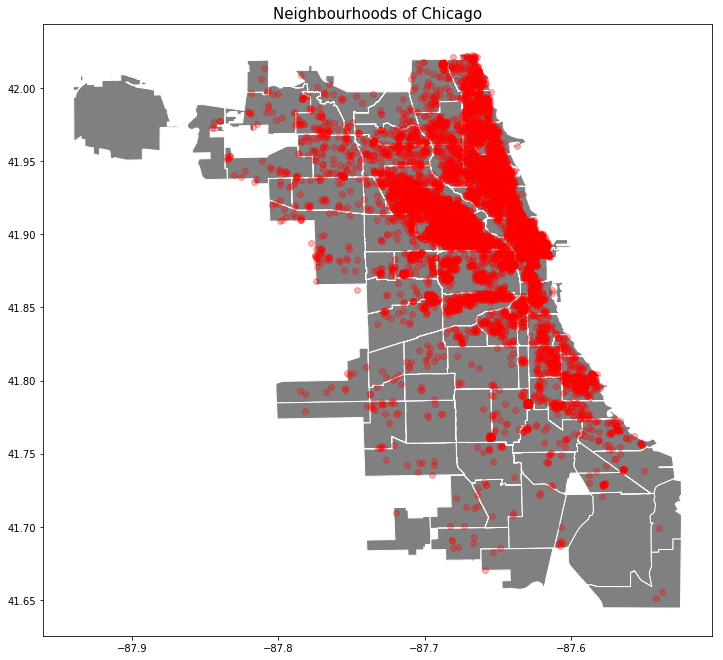

In [48]:
f, ax = plt.subplots(figsize=(12, 12))
combined_gdf.plot(ax=ax,column = 'neighbourhood',color='grey',edgecolor='white', legend = True, legend_kwds = {'title':'Neighbourhoods', 'loc':'lower center','bbox_to_anchor':(0.5, -0.6),'ncol':4}, axes = ax)
#ax.scatter(chicago_listings_sum.longitude[0:15], chicago_listings_sum.latitude[0:15], alpha = 0.3)
plt.scatter(chicago_listings_sum.longitude, chicago_listings_sum.latitude, alpha=0.3, color='red')
plt.title('Neighbourhoods of Chicago', size = 15)
plt.show()

In [40]:
chicago = (41.881832, -87.623177)
fmap = folium.Map(location=chicago, zoom_start=15, zoom_control=True)
folium.GeoJson(neighbourhoods[neighbourhoods.neighbourhood == 'Lincoln Park'].geometry).add_to(fmap)
LP_series = gpd.GeoDataFrame(neighbourhoods[neighbourhoods.neighbourhood == 'Lincoln Park'])
LP_series.reset_index(inplace=True)
LP_coord = LP_series.center[0]
LP_rev_coord = [LP_coord.y, LP_coord.x]
lp_marker = folium.Marker(location=LP_rev_coord, popup='Lincoln Park')
lp_marker.add_to(fmap)
chicago_marker = folium.Marker(location=chicago, popup='<strong>'+'Chicago'+'</strong>')
chicago_marker.add_to(fmap)
display(fmap)

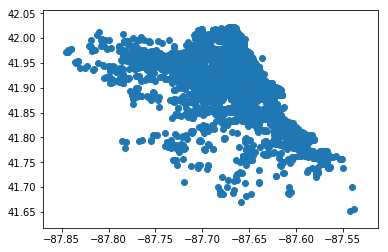

In [41]:
plt.scatter(chicago_listings_sum.longitude.values, chicago_listings_sum.latitude.values)
plt.show()

In [18]:
chicago_listings_sum.longitude

0       -87.58670890962763
1       -87.69696178980683
2       -87.66009125412157
3       -87.68182159890866
4       -87.63787943696494
5       -87.59194893566665
6       -87.63999816109653
7        -87.6332002165527
8       -87.64950965740992
9       -87.66041074465691
10      -87.65790583136416
11      -87.65521134306644
12      -87.65928448895485
13      -87.63846121515834
14      -87.65752710877798
15        -87.665389385576
16      -87.63465211289514
17      -87.65730729203216
18      -87.63964488411452
19      -87.63978766554311
20      -87.65845858800222
21      -87.63979373615418
22      -87.67988892129965
23        -87.657568608925
24      -87.70468434615341
25      -87.68032885587718
26      -87.65621311417983
27      -87.65122778834323
28       -87.6807822185988
29      -87.65763171002189
               ...        
7773    -87.64232766040755
7774    -87.65345891012542
7775    -87.66554797956528
7776    -87.64491904894982
7777    -87.71741034044285
7778    -87.66627984803803
7